# Module 3 : Performance measurements of Logistic regression  algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# warning
import warnings
warnings.filterwarnings("ignore")
data= pd.read_csv(r'/Users/sreekarsontam/Desktop/liver/doc/liver_patient (1).csv')
data.head()
data.duplicated().sum()
data.shape
data = data.drop_duplicates()
data.shape
data.isnull().sum()
df=data.dropna()
df.isnull().sum()
df = df.rename({'Dataset': 'Result'}, axis=1) 
df.columns
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)
df.Result.value_counts()
df.corr()
X = df.drop(labels='Result', axis=1)
#Response variable
y = df.loc[:,'Result']   
from imblearn.combine import SMOTETomek
smk = SMOTETomek(sampling_strategy=1,random_state=42)
x1,y1 = smk.fit_resample(X,y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1=scaler.fit_transform(x1)
x1
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score,ConfusionMatrixDisplay

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# warning
import warnings
warnings.filterwarnings("ignore")

In [5]:
# load given data
data= pd.read_csv(r'/Users/sreekarsontam/Desktop/liver/doc/liver_patient (1).csv')

In [6]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
data.duplicated().sum()

13

In [8]:
data.shape

(583, 11)

In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(570, 11)

In [11]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [12]:
df=data.dropna()

In [13]:
df.shape

(566, 11)

In [14]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [15]:
#changing feature name
df = df.rename({'Dataset': 'Result'}, axis=1) 

In [16]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Result'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)


In [18]:
df.Result.value_counts()

1    404
2    162
Name: Result, dtype: int64

In [19]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
Age,1.000000,0.057542,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,-0.133821
Gender,0.057542,1.000000,0.089068,0.100448,-0.024879,0.083336,0.080593,-0.092049,-0.093208,-0.005611,-0.077396
Total_Bilirubin,0.010704,0.089068,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,-0.224467
Direct_Bilirubin,0.006268,0.100448,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,-0.250926
Alkaline_Phosphotase,0.080085,-0.024879,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,-0.186057
Alamine_Aminotransferase,-0.084319,0.083336,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,-0.161617
Aspartate_Aminotransferase,-0.017352,0.080593,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,-0.151009
Total_Protiens,-0.195893,-0.092049,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,0.036443
Albumin,-0.269448,-0.093208,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,0.165273
Albumin_and_Globulin_Ratio,-0.215967,-0.005611,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,0.171402


In [20]:
X = df.drop(labels='Result', axis=1)
#Response variable
y = df.loc[:,'Result']    

In [21]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(sampling_strategy=1,random_state=42)
x1,y1 = smk.fit_resample(X,y)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1=scaler.fit_transform(x1)
x1

array([[ 1.26146047, -1.40590273, -0.35733089, ...,  0.27949773,
         0.12074342, -0.25156283],
       [ 1.07906334,  0.71128676,  1.51110235, ...,  0.95197036,
        -0.00984124, -0.77767377],
       [ 1.07906334,  0.71128676,  0.85165533, ...,  0.47163276,
         0.12074342, -0.28444477],
       ...,
       [ 0.53187195, -1.40590273, -0.29467418, ..., -0.48247646,
        -0.5024929 , -0.5168657 ],
       [ 0.28867577,  0.71128676, -0.35733089, ...,  1.78191642,
         1.26996782,  0.07101232],
       [-0.98810414,  0.71128676, -0.35412955, ...,  0.35877604,
         0.53531898,  0.27039917]])

In [23]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score,ConfusionMatrixDisplay

In [24]:

#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size=0.3, random_state=1, stratify=y1)


In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
ypred = model.predict(X_train)

In [53]:
ypred = model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy_score(y_test,ypred)

0.759825327510917

In [26]:
import pickle
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report

In [27]:
model = pickle.load(open('/Users/sreekarsontam/Desktop/liver/codes/logisticregression.h5', 'rb'))

In [29]:
ypred =model.predict(X_test)

In [30]:
print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

           1       0.84      0.64      0.73       114
           2       0.71      0.88      0.79       115

    accuracy                           0.76       229
   macro avg       0.78      0.76      0.76       229
weighted avg       0.77      0.76      0.76       229



In [31]:
print("")
print('Classification report of Logistic Regression Results:')
print("")

print(classification_report(y_test,ypred))
b = (accuracy_score(y_test,ypred)*100)

print('Accuracy result of Logistic Regression is:', b)
print("")
cm1=confusion_matrix(y_test,ypred)
print('Confusion Matrix result of Logistic Regression is:\n',cm1)
print("")
sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)
print("")

from sklearn.model_selection import cross_val_score

b = cross_val_score(model, X_train, y_train, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(b)


Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

           1       0.84      0.64      0.73       114
           2       0.71      0.88      0.79       115

    accuracy                           0.76       229
   macro avg       0.78      0.76      0.76       229
weighted avg       0.77      0.76      0.76       229

Accuracy result of Logistic Regression is: 75.9825327510917

Confusion Matrix result of Logistic Regression is:
 [[ 73  41]
 [ 14 101]]

Sensitivity :  0.8782608695652174

Specificity :  0.6403508771929824

Cross validation test results of accuracy:
[0.72897196 0.72897196 0.71962617 0.77358491 0.74528302]


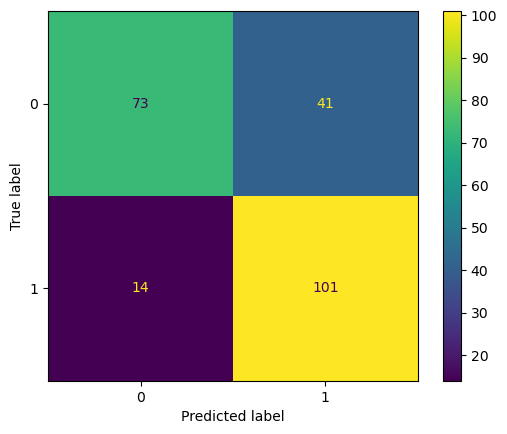

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, ypred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

True Positive : 101
True Negative : 73
False Positive : 41
False Negative : 14

True Positive Rate : 0.8782608695652174
True Negative Rate : 0.6403508771929824
False Positive Rate : 0.35964912280701755
False Negative Rate : 0.12173913043478261

Positive Predictive Value : 0.7112676056338029
Negative predictive value : 0.8390804597701149
Confusion matrix-RF:
[[ 73  41]
 [ 14 101]]


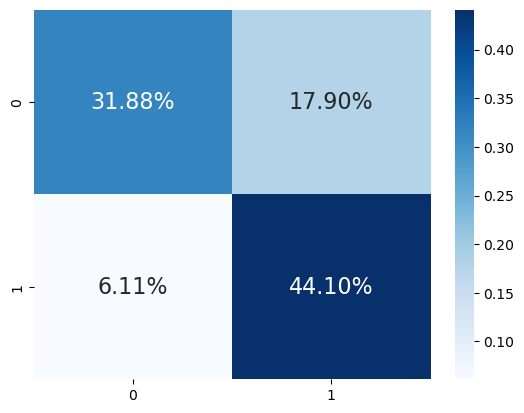

In [33]:
TN = cm1[0][0]
FN = cm1[1][0]
TP = cm1[1][1]
FP = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

def plot_confusion_matrix(cm2, title='Confusion matrix-RF', cmap=plt.cm.Blues):
    target_names=['']
    plt.imshow(cm2, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm2=confusion_matrix(y_test, ypred)
print('Confusion matrix-RF:')
print(cm2)

sns.heatmap(cm2/np.sum(cm2), annot=True, cmap = 'Blues', annot_kws={"size": 16},fmt='.2%')
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))


#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred)

Accuracy Score : 0.759825327510917


array([[ 73,  41],
       [ 14, 101]])

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score,f1_score
pd.DataFrame(data=[accuracy_score(y_test, ypred), recall_score(y_test, ypred),
                   precision_score(y_test, ypred), roc_auc_score(y_test, ypred),f1_score(y_test,ypred)], 
                   index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.759825
recall,0.640351
precision,0.839080
roc_auc_score,0.759306
f1_score,0.726368
